In [2]:
#importing libraries
import pandas as pd
import numpy as np
#from sklearn.preprocessing import Imputer
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [3]:
#Loading Data
df = pd.read_csv("Loan (1).csv")
df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.shape

(614, 13)

In [5]:
#data types
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [6]:
#checking null values in %
print(df.isnull().sum()*100/len(df))

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64


Missing values are there in the data but they are not high in number. Not a bad sign..!!!!

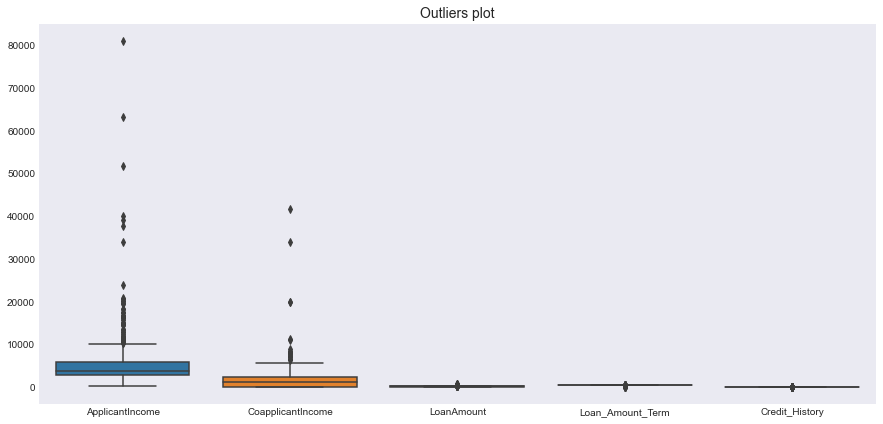

In [7]:
#checking outliers in data using boxplot
plt.style.use('seaborn-dark')
plt.rcParams['figure.figsize']= (15, 9)
fig = plt.figure(figsize = (15, 7))
ax = sns.boxplot(data = df, orient='v')
plt.title('Outliers plot', fontsize = 14)
plt.show()

In [8]:
#Lets check descriptive stats 
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [9]:
for col in df.columns:
    a = df[col].value_counts()
    print(pd.DataFrame(a))

          Loan_ID
LP002341        1
LP001520        1
LP002517        1
LP001792        1
LP002983        1
...           ...
LP001786        1
LP002297        1
LP002130        1
LP001137        1
LP002142        1

[614 rows x 1 columns]
        Gender
Male       489
Female     112
     Married
Yes      398
No       213
    Dependents
0          345
1          102
2          101
3+          51
              Education
Graduate            480
Not Graduate        134
     Self_Employed
No             500
Yes             82
      ApplicantIncome
2500                9
6000                6
2600                6
4583                6
4166                5
...               ...
5503                1
3450                1
2425                1
2423                1
4095                1

[505 rows x 1 columns]
        CoapplicantIncome
0.0                   273
2500.0                  5
2083.0                  5
1666.0                  5
1625.0                  3
...                   ...
23

### Feature Engineering

In [10]:
df.Dependents=df.Dependents.map({'0':0,'1':1,'2':2,'3+':3})
df['Dependents'].value_counts()

0.0    345
1.0    102
2.0    101
3.0     51
Name: Dependents, dtype: int64

### Exploratory Data Analyis


#### Comparison between Parameters in getting the Loan:

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

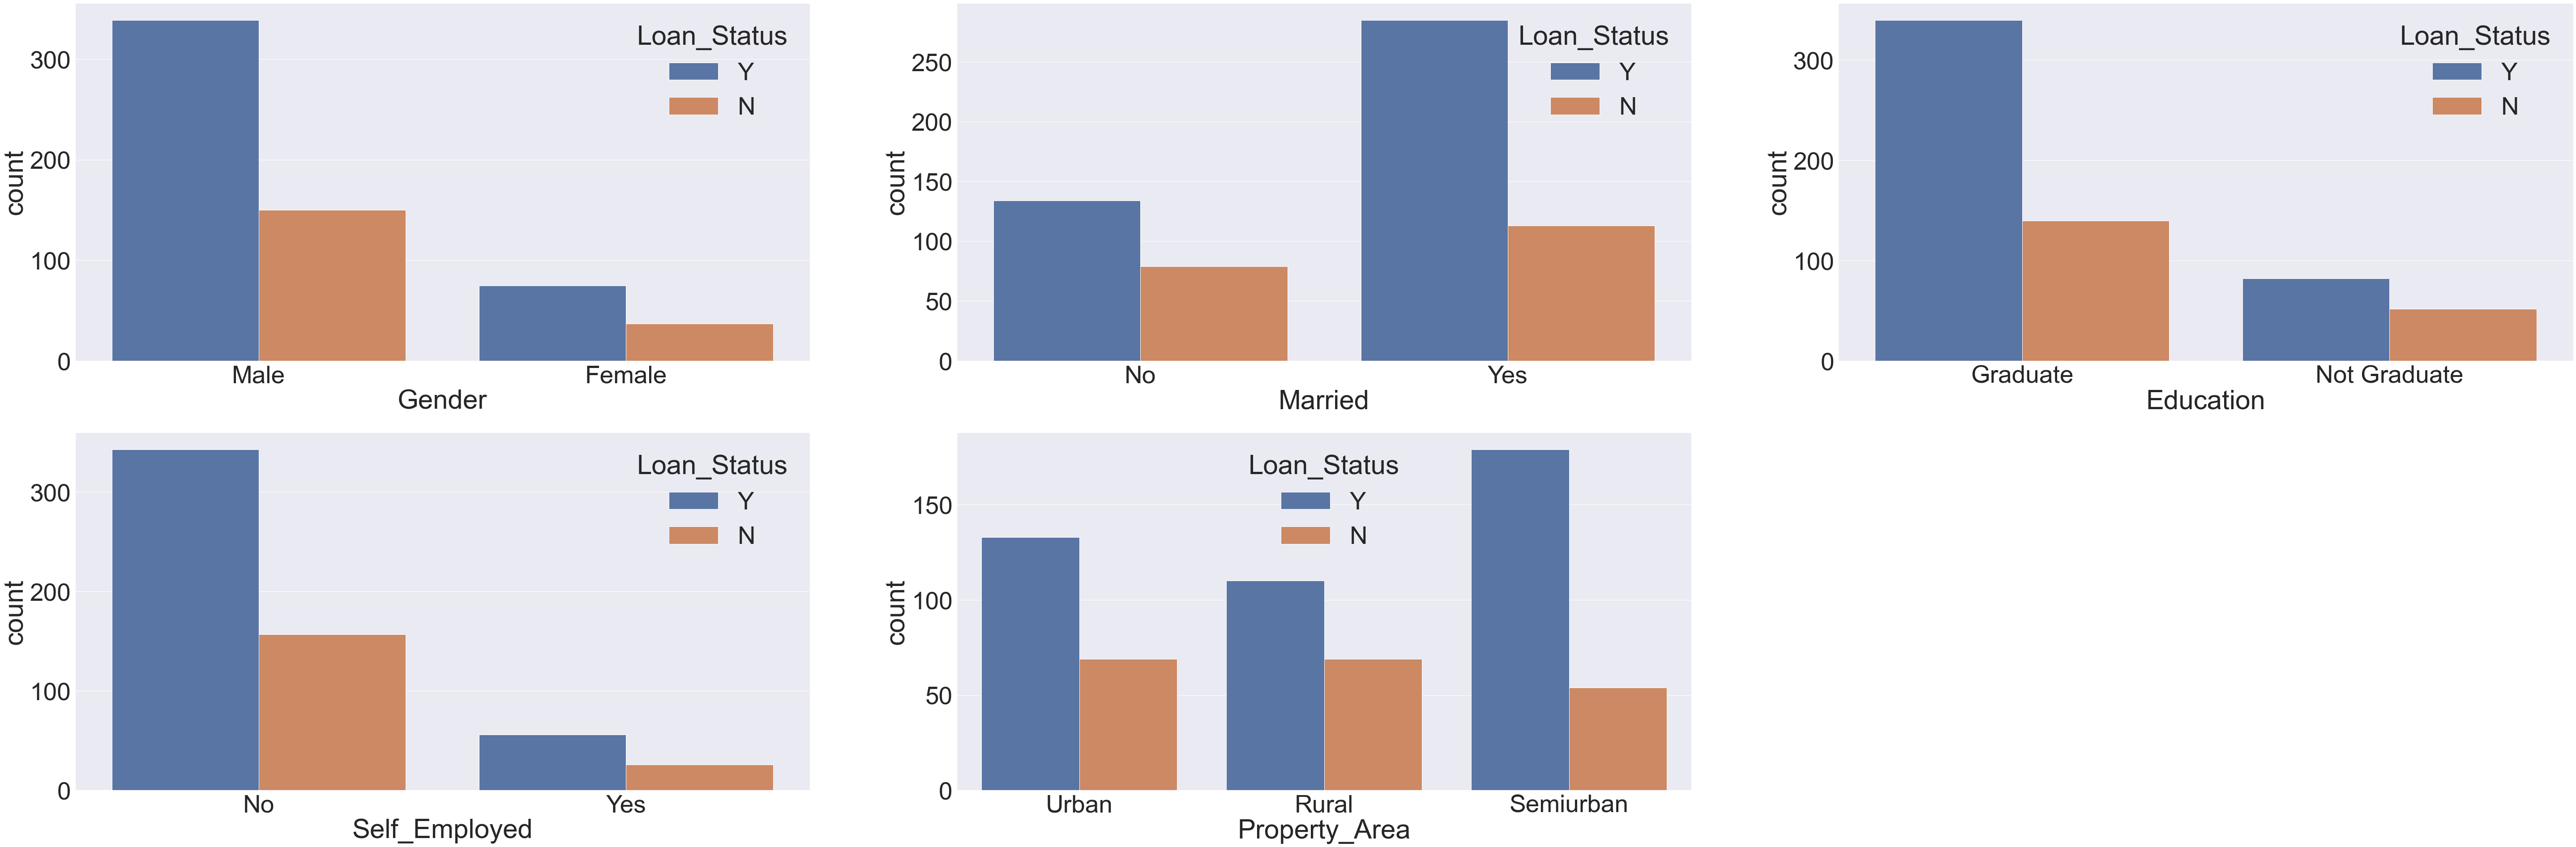

In [11]:
plt.figure(figsize = (100, 50))
sns.set(font_scale = 5)
plt.subplot(331)
sns.countplot(df['Gender'],hue=df['Loan_Status'])

plt.subplot(332)
sns.countplot(df['Married'],hue=df['Loan_Status'])

plt.subplot(333)
sns.countplot(df['Education'],hue=df['Loan_Status'])

plt.subplot(334)
sns.countplot(df['Self_Employed'],hue=df['Loan_Status'])

plt.subplot(335)
sns.countplot(df['Property_Area'],hue=df['Loan_Status'])

##### As we observe the above  plots:
Male customers are high  in number than female. so obviously male customers with loan status yes are more.

They are more Married customers in the bank and loan staus yes with married customers is more.

Graduate customers are high in number and loan status with yes is also high.

self-employed customers are more in bank.

Customers from semi urban area are more compared with urban and rural area. So urban area customers with loan status yes are high in number.

In [15]:
#taking dupicate of data
loan = df.copy()
loan.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [16]:
#filling the null values
loan['LoanAmount'] = loan['LoanAmount'].fillna((loan['LoanAmount'].mean()))
loan['Loan_Amount_Term'] = loan['Loan_Amount_Term'].fillna((loan['Loan_Amount_Term'].median()))
loan['Credit_History'] = loan['Credit_History'].fillna((loan['Credit_History'].median()))
loan['Dependents'] = loan['Dependents'].fillna((loan['Dependents'].median()))

In [17]:
#dropping Loan ID from data
loan.drop(["Loan_ID"], axis = 1, inplace = True)

In [18]:
#perfoming one hot encoding
loan = pd.get_dummies(loan, drop_first=True)
loan.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,0.0,5849,0.0,146.412162,360.0,1.0,1,0,0,0,0,1,1
1,1.0,4583,1508.0,128.000000,360.0,1.0,1,1,0,0,0,0,0
2,0.0,3000,0.0,66.000000,360.0,1.0,1,1,0,1,0,1,1
3,0.0,2583,2358.0,120.000000,360.0,1.0,1,1,1,0,0,1,1
4,0.0,6000,0.0,141.000000,360.0,1.0,1,0,0,0,0,1,1


### Checking correlation

In [20]:

corr = loan.corr()
corr

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
Dependents,1.000000,0.118202,0.030430,0.163106,-0.103864,-0.040160,0.148500,0.340684,0.055752,0.056798,0.001924,-0.001198,0.010118
ApplicantIncome,0.118202,1.000000,-0.116605,0.565620,-0.046531,-0.018615,0.013933,0.050194,-0.140760,0.127180,-0.014246,-0.000598,-0.004710
CoapplicantIncome,0.030430,-0.116605,1.000000,0.187828,-0.059383,0.011134,0.082316,0.080496,-0.062290,-0.016100,-0.027044,0.022776,-0.059187
LoanAmount,0.163106,0.565620,0.187828,1.000000,0.036475,-0.001431,0.064609,0.145643,-0.166998,0.115260,-0.008273,-0.033220,-0.036416
Loan_Amount_Term,-0.103864,-0.046531,-0.059383,0.036475,1.000000,-0.004705,-0.070288,-0.103381,-0.073928,-0.033739,0.059141,-0.094279,-0.022549
Credit_History,-0.040160,-0.018615,0.011134,-0.001431,-0.004705,1.000000,0.021612,0.006690,-0.073658,-0.001550,0.035976,-0.016934,0.540556
Gender_Male,0.148500,0.013933,0.082316,0.064609,-0.070288,0.021612,1.000000,0.339026,0.061497,-0.027421,-0.113069,0.044109,0.025407
Married_Yes,0.340684,0.050194,0.080496,0.145643,-0.103381,0.006690,0.339026,1.000000,0.017671,0.008491,-0.000229,0.000449,0.084281
Education_Not Graduate,0.055752,-0.140760,-0.062290,-0.166998,-0.073928,-0.073658,0.061497,0.017671,1.000000,-0.010383,-0.039410,-0.034279,-0.085884
Self_Employed_Yes,0.056798,0.127180,-0.016100,0.115260,-0.033739,-0.001550,-0.027421,0.008491,-0.010383,1.000000,0.008710,-0.030338,-0.003700


In [30]:
#Lets check the multi-colinearty btw variabels in positively and negatively

corr_new = corr.where(np.triu(np.ones(corr.shape),k = 1).astype(np.bool))
corr_new = corr_new.unstack().transpose().sort_values(ascending = False).dropna()

corr_new = corr_new[(corr_new > 0.5)|(corr_new < -0.5)] #checking above +0.7 and below -0.7
corr_new

LoanAmount           ApplicantIncome            0.565620
Loan_Status_Y        Credit_History             0.540556
Property_Area_Urban  Property_Area_Semiurban   -0.547574
dtype: float64

From above correlation values I can conclude that there is not a correlation btw features

In [21]:
#splitting the independent variables
x = loan.iloc[:,:-1]
x.head(5)

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,0.0,5849,0.0,146.412162,360.0,1.0,1,0,0,0,0,1
1,1.0,4583,1508.0,128.000000,360.0,1.0,1,1,0,0,0,0
2,0.0,3000,0.0,66.000000,360.0,1.0,1,1,0,1,0,1
3,0.0,2583,2358.0,120.000000,360.0,1.0,1,1,1,0,0,1
4,0.0,6000,0.0,141.000000,360.0,1.0,1,0,0,0,0,1


In [22]:
#dependent variable
y = loan.iloc[:,-1]
y.head(4)

0    1
1    0
2    1
3    1
Name: Loan_Status_Y, dtype: uint8

In [23]:
#splitting the data to train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)

In [24]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
predictions_lr = lr.predict(x_test)
accuracy = accuracy_score(y_test, predictions_lr)
print("Accuracy with linear regressor :",accuracy)

Accuracy with linear regressor : 0.7891891891891892


In [25]:
xg= XGBClassifier()
xg.fit(x_train, y_train)
predictions_xg = xg.predict(x_test)
accuracy = accuracy_score(y_test, predictions_xg)
print("Accuracy with XGBRFRegressor:",accuracy)

[21:32:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy with XGBRFRegressor: 0.7405405405405405


In [26]:
rf= RandomForestClassifier(n_estimators=500, random_state=42)
rf.fit(x_train, y_train)
predictions_rf = xg.predict(x_test)
accuracy = accuracy_score(y_test, predictions_rf)
print("Accuracy with Random forest:",accuracy)

Accuracy with Random forest: 0.7405405405405405


I builded model with Logistic Regresion, XG boost Classifier and Random forest classifier amoung them logistic regression model gave me best scores(78.9%) which is not that bad I guess.